In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Data structure for model execution time comparison
data_time = {
    'STGCN': [506.684727668762, 619.599154949188],
    'GWNet': [2451.77108454704, 2484.27499628067],
    'AGCRN': [1104.32851314544, 1170.00182461738],
    'LSTM': [361.489282131195, 467.749671459198],
    'STAE': [812.9367891, 822.1670234],
    'D2STGNN': [1036.055484, 1036.734739]
}

# Data structure for model parameter size 
data_paramter = {
    'STGCN': [0.30734, 0.308895],
    'GWNet': [0.303344, 0.304899],
    'AGCRN': [0.907848, 0.909403],
    'LSTM': [0.097932, 0.099487],
    'STAE': [1.372260, 1.469800],
    'D2STGNN': [0.396916, 0.411363]
}

# Data structure for model MAE comparison
data_MAE = {
    'STGCN': [2.0426, 1.9918],
    'GWNet': [2.0399,2.0187],
    'AGCRN': [2.0168, 1.9972],
    'LSTM': [2.3897, 2.364]
}

# Color name mappings
cname = {
    'lightblue': '#ADD8E6',
    'lightcoral': '#F08080', 
    'lightcyan': '#E0FFFF',
    'lightgoldenrodyellow': '#FAFAD2',
    'lightgreen': '#90EE90',
    'lightgray': '#D3D3D3',
    'lightpink': '#FFB6C1',
    'lightsalmon': '#FFA07A',
    'lightseagreen': '#20B2AA',
    'lightskyblue': '#87CEFA',
    'lightslategray': '#778899',
    'lightsteelblue': '#B0C4DE',
    'lightyellow': '#FFFFE0'
}


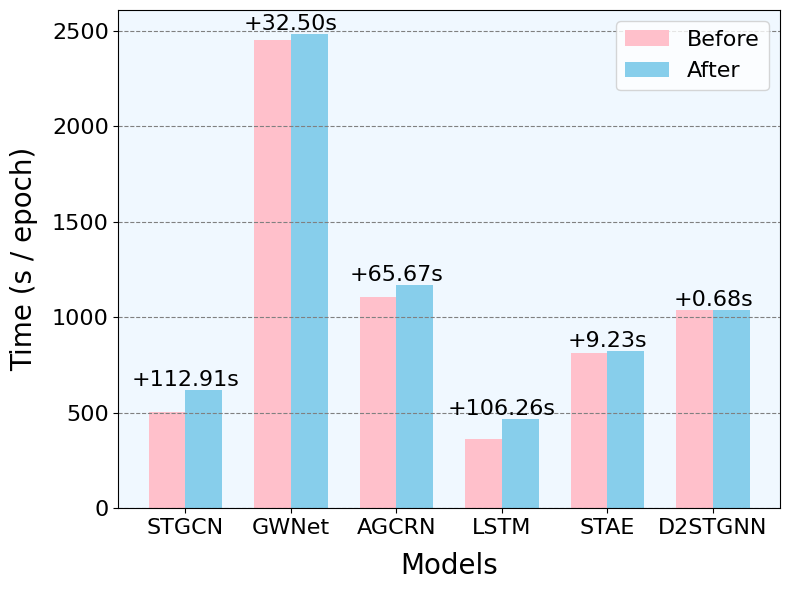

In [8]:
# Plot execution time comparison
methods = list(data_time.keys())
before_values = np.array([item[0] for item in data_time.values()])
after_values = np.array([item[1] for item in data_time.values()])

bar_width = 0.35
index = np.arange(len(methods))

fig, ax = plt.subplots(figsize=(8, 6))
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.8)
bar1 = ax.bar(index, before_values, bar_width, label='Before', color='pink')
bar2 = ax.bar(index + bar_width, after_values, bar_width, label='After', color='skyblue')

# Configure axes and labels
ax.set_xlabel('Models', fontsize=20, labelpad=10)
ax.set_ylabel('Time (s / epoch)', fontsize=20, labelpad=10) 
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(methods, fontsize=16)
ax.legend(fontsize=16)
ax.tick_params(axis='y', labelsize=16)

# Set plot background color
ax.set_facecolor('aliceblue')

# Add value labels
for i in range(len(methods)):
    increase_time = after_values[i] - before_values[i]
    ax.text(index[i] + bar_width / 2, max(before_values[i], after_values[i]) + 0,
            f'+{increase_time:.2f}s', ha='center', va='bottom', fontsize=16)

plt.tight_layout()
plt.savefig('./output/time_compare.pdf', dpi=800, bbox_inches='tight')

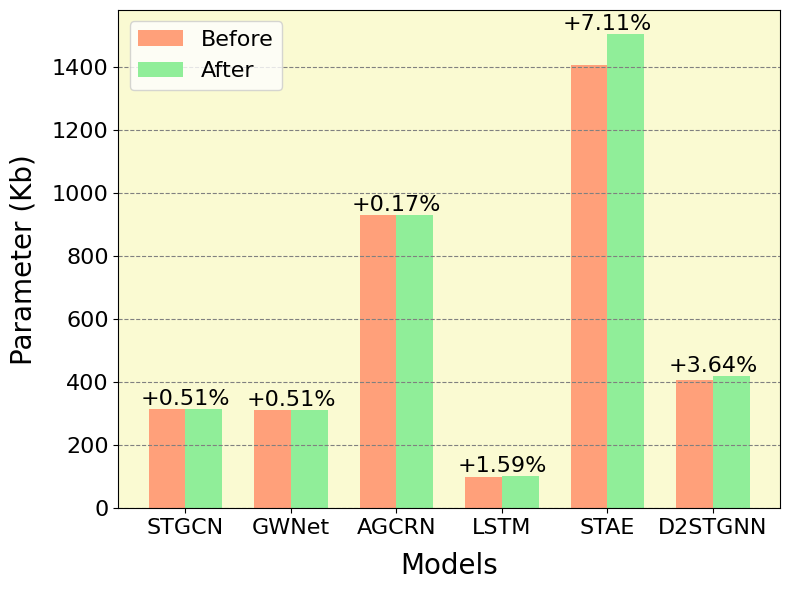

In [9]:
# Plot parameter size comparison 
methods = list(data_paramter.keys())
before_values = np.array([item[0] * 1024 for item in data_paramter.values()])
after_values = np.array([item[1] * 1024 for item in data_paramter.values()])

bar_width = 0.35
index = np.arange(len(methods))

fig, ax = plt.subplots(figsize=(8, 6))
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.8)
bar1 = ax.bar(index, before_values, bar_width, label='Before', color='lightsalmon')
bar2 = ax.bar(index + bar_width, after_values, bar_width, label='After', color='#90EE99')

# Configure axes and labels
ax.set_xlabel('Models', fontsize=20, labelpad=10)
ax.set_ylabel('Parameter (Kb)', fontsize=20, labelpad=10)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(methods, fontsize=16)
ax.legend(fontsize=16)
ax.tick_params(axis='y', labelsize=16)

# Set plot background color
ax.set_facecolor('lightgoldenrodyellow')

# Add percentage labels
for i in range(len(methods)):
    increase_percentage = ((after_values[i] - before_values[i]) / before_values[i]) * 100
    ax.text(index[i] + bar_width / 2, max(before_values[i], after_values[i]) + 0,
            f'+{increase_percentage:.2f}%', ha='center', va='bottom', fontsize=16)

plt.tight_layout()
plt.savefig('./output/parm_compare.pdf', dpi=800, bbox_inches='tight')

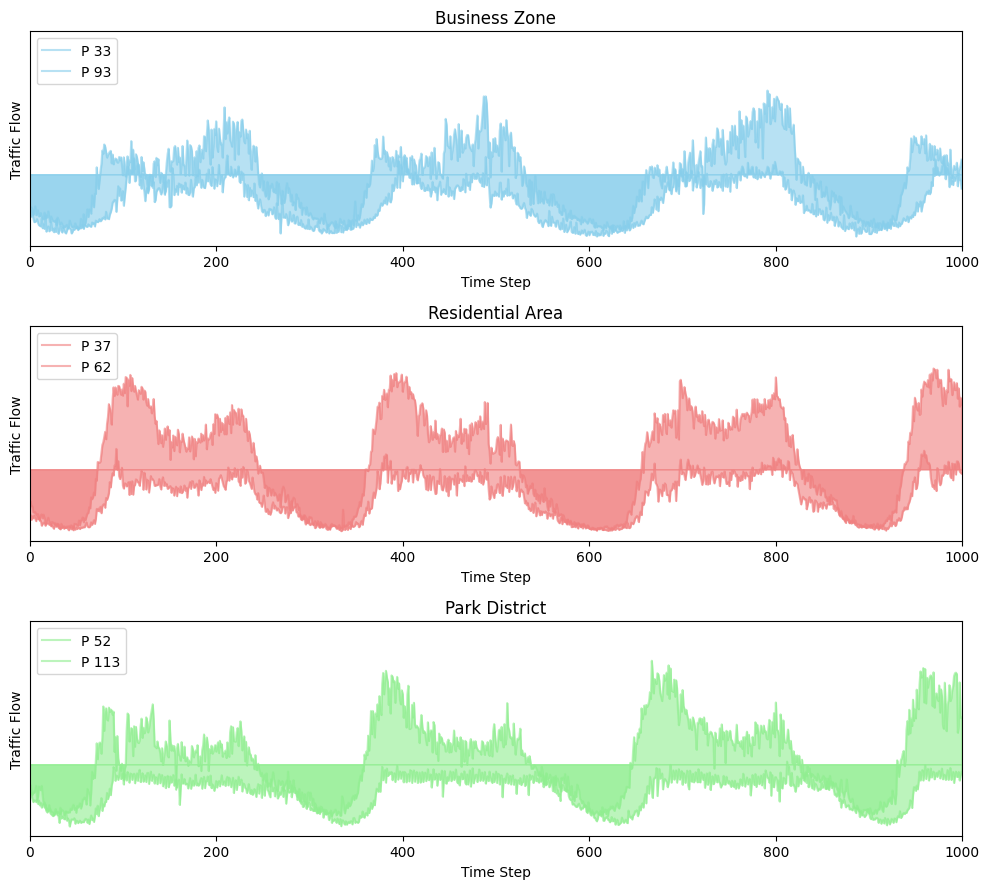

In [10]:
# Load and plot traffic flow data
pems04 = np.load('../data/pems04/2018/his.npz')
data = pems04['data']
# Selected points for different zones
points = [33, 93, 37, 62, 52, 113]  # Business, Residential, Park areas

# Plot ridge maps for different zones
fig, axs = plt.subplots(3, 1, figsize=(10, 9))

colors = ['skyblue', 'lightcoral', 'lightgreen']
ylabels = ['Business Zone', 'Residential Area', 'Park District']
alpha = 0.6

for i, ax in enumerate(axs):
    point1, point2 = points[i*2], points[i*2+1]
    feature_data = data[2000:3000, [point1, point2], 0]

    # Plot ridge lines
    ax.plot(feature_data[:, 0], label=f'P {point1}', color=colors[i], alpha=alpha)
    ax.plot(feature_data[:, 1], label=f'P {point2}', color=colors[i], alpha=alpha)

    # Fill areas under curves
    ax.fill_between(range(len(feature_data)), feature_data[:, 0], color=colors[i], alpha=alpha)
    ax.fill_between(range(len(feature_data)), feature_data[:, 1], color=colors[i], alpha=alpha)

    # Configure subplot
    ax.set_title(ylabels[i])
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Traffic Flow')
    ax.set_xlim(0, len(feature_data))
    ax.legend(loc='upper left')

# Set common y-axis properties
for ax in axs:
    ax.set_yticks([])
    ax.set_ylim(-1.5, 3)

plt.tight_layout()
plt.savefig('./output/ridge_map.pdf', dpi=800, bbox_inches='tight')